## Импорт необходимых библиотек

In [42]:
!pip3 install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00


In [40]:
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import output
output.enable_custom_widget_manager()


# Задача о полтергейсте


## Исходные данные:
Дана функция полтергейста, определённая на плоскости XY. Смысл функции состоит в плотности вероятности обнаружить полтергейста около точки на плоскости. Функция являестя положительно определённой, её интеграл по площади единице с точностью до 0.1 процента, функция является не факторизуемой по функциям двух независимых переменных. Функция дана в виде программы-чёрного ящика poltergeist, которая на вход принимает координаты на плоскости, а возвращает вещественные числа - значения этой функции.


## Интерфейс функции полтергейста:
Функция реализована в виде исполняемого файла poltergeist. Для корректной работы программы необходимо поместить текстовый файл с именем input.txt в директорию, содержашую программу poltergeist. Этот файл содержит координаты точек на плоскости. Алгоритм считывания данных из файла input.txt следующий: программа poltergeist считывает из первой строчки файла input.txt первые два числа, разделённые пробелом, вся остальная строка справа (отделённая пробелом от второго числа) программой не читается и может быть оставлена пустой; первое считанное число имеет смысл координаты 'x' на области определения функции полтергейста, а второе --- координаты 'y'; далее программа создаёт в содержащей её директории файл output.txt, в котором первая строчка заполняется одним числом, равным значению функции полтергейста в точке с координатами 'x' и 'y'; затем процесс повторяется для второй строчки из файла input.txt, причём значение функции при новых координатах 'x' и 'y' записывается во вторую строчку файла output.txt; процесс выполнения программы poltergeist продолжается до тех пор, пока текущая строчка из файла input.txt имеет два числа в начале строчки.



## Постановка задачи:
Требуется написать код программы, который по требованию случайным образом создаёт точку на плоскости в соответствии с данной в функции полтергейста плотнсотью вероятности. Генерирование координат точки можно рассматривать как появление полтергейста в окрестности этой точки. Многократный вызов программы позволит построить 3-х мерную гистограмму и сравнить её с функцией полтергейста. Они должны совпадать.


## Решение задачи

* Изначально был написан скрипт, получающий на вход в качестве аргументов координаты x, y - максимально удаленные точки для которых необходимо восстановить вероятность.

* Формируется файл с всевозможными координатами, а затем запускается "черный ящик", который возвращает вероятности для координат.

* После для удобства все объединяется в один .txt файл вида:
$$
x_1, y_1: probability_1 \\
... \\
x_n, y_n: probability_n
$$
* С полученным файлом работа продолжается в этом ноутбуке.
Полученные данные считываются, затем к полученной функции распределения осуществяется k запросов.

* На основе полученных данных строится трехмерная диаграмма, где \\
$$
x - первая\ координата \\ y - вторая\ координата \\ z - количество\ точек\ в\ этой\ координате.
$$




In [48]:
with open('output.txt', 'r') as coords_proba:
  data = coords_proba.readlines()

In [12]:
coords = []
proba = []
for line in data:
  coords.append([float(line.split(' ')[0]), float(line.split(' ')[1][:-1])])
  proba.append(float(line.split(' ')[2][:-2]))

In [49]:
%%time
k = 100000
polter = {}
for i in range(k):
  coord = random.choices(coords, weights=proba, k=1)
  coord = (coord[0][0], coord[0][1])
  if coord in polter:
    polter[coord] += 1
  else:
    polter[coord] = 1

CPU times: user 1min 27s, sys: 228 ms, total: 1min 27s
Wall time: 1min 29s


In [50]:
x = []
y = []
z = []
for key in polter:
  x.append(key[0])
  y.append(key[1])
  z.append(polter[key])

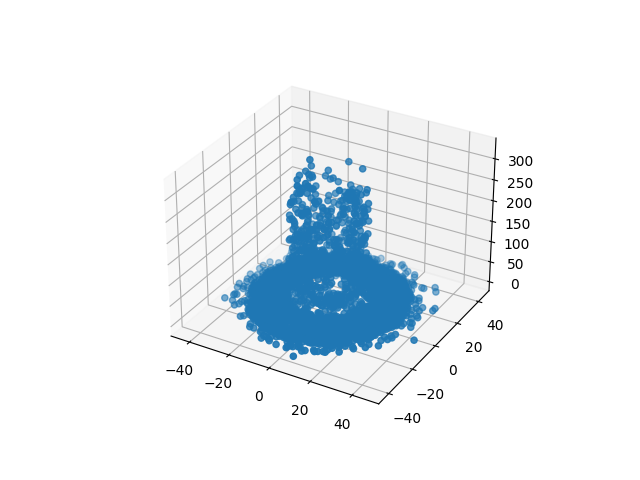

In [51]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()